# LFV Higgs decays in SeeSaw model ( Thao et al results) First numeric results no compatibles con seesaw new discussions.

## In this notebook we use the mpmath implementations of PaVe functions

In [4]:
from sympy import init_printing, Symbol,lambdify, symbols
init_printing()
import OneLoopLFVHD as lfvhd

In [5]:
from seesaw_FF import AaL, AaR, AbL, AbR, AcdL, AcdR
from seesaw_FF import g, mW, Uν, Uνc, mn, m, C, Cc, a,b,i,j,h
from seesaw_FF import j as jj

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from mpmath import *

In [8]:
mp.dps = 80; mp.pretty = True

In [9]:
import numpy as np

In [10]:
from multiprocessing import Pool
from time import time

In [48]:
def speedup_array(f,array,procs=4): 
    pool = Pool(procs,maxtasksperchild=100).map(f, array)
    result = np.array(list(pool))
    return result

## Numeric implementation of form factors

**Neutrino benchmark** is given by 

In [12]:
from OneLoopLFVHD.neutrinos import NuOscObservables
Nudata = NuOscObservables

In [13]:
m1 = mpf('1e-12')  #GeV 

#current values to Square mass differences
d21 = mpf(str(Nudata.squareDm21.central))*mpf('1e-18')# factor to convert eV^2 to GeV^2
d31 = mpf(str(Nudata.squareDm31.central))*mpf('1e-18')

#d21 = 7.5e-5*1e-18
#d31 = 2.457e-3*1e-18
m2 = sqrt(m1**2 + d21)
m3 = sqrt(m1**2 + d31)

m4 = lambda m6: m6/3
m5 = lambda m6: m6/2

### Form factor with one fermion in the loop.

#### AL one fermion 

In [14]:
from OneLoopLFVHD.data import ml

In [15]:
def GIM_One(exp):
    from sympy import Add
    args = exp.expand().args
    func = exp.expand().func
    if isinstance(func,Add):
        X = Add(*[t for t in args if t.has(mni)]).simplify()
    else:
        X = exp
    #X1 = X.collect([mni],evaluate=False)
    return X#mni**2*X1[mni**2]

In [16]:
def sumOne(m6,Aab,a,b): 
    mnk = [m1,m2,m3,m6/3,m6/2,m6]
    AL = 0.0
    for i in range(4,7):
        A = Aab(mnk[i-1],Unu(m1,m6,b,i),conj(Unu(m1,m6,a,i)))
        #print('Ai = ',A)
        AL += A
    return AL


In [17]:
mh,ma,mb = symbols('m_h,m_a,m_b',real=True)
valores ={mW:mpf(80.379),mh:mpf(125.10),g:(2*mpf(80.379))/mpf(246)}

cambios_hab = lambda a,b:{lfvhd.ma:valores[mh],lfvhd.mi:ml[a],lfvhd.mj:ml[b]}


Ubi, Ucai,mni = symbols('U_{bi}, {{U_{ai}^*}},m_{n_i}')
UnuOne = {mn[i]:mni,Uν[b,i]:Ubi,Uνc[a,i]:Ucai}

#from Unu_seesaw import Unu, Cij, Unusym, Cijsym, Unu1, Cij1
from Unu_seesaw import Unump as Unu # no mixing
from Unu_seesaw import Cijmp as Cij # no mixing

In [18]:
from OneLoopLFVHD.data import replaceBs, pave_functions

In [19]:
def numeric_sum_diagramsOne(Diagramas,a,b):
    FdiagOneFer = []
    for dia in Diagramas:
        x = GIM_One(dia.subs(lfvhd.D,4).subs(cambios_hab(a,b)).subs(valores).subs(UnuOne))
        f = lambdify([mni,Ubi,Ucai],replaceBs(x),
                     modules=[pave_functions(valores[mh],a,b,lib='mpmath'),'mpmath'])
        #print(f(1,2,3))
        #fsum = lambda m6:sumOne(m6,f,a,b)
        FdiagOneFer.append(f)
    def suma(m6):
        out = 0.0
        xs = []
        for g in FdiagOneFer:
            #print('inside of sumOne')
            #x = g(m6)
            x = sumOne(m6,g,a,b)
            out += x
            xs.append(x)
        return np.array(xs),out
    return suma

In [20]:
DiagramasOneL = [AaL,AcdL]
DiagramasOneR = [AaR,AcdR]
# #a = 2, b = 3
# ALOneTot23 = numeric_sum_diagramsOne(DiagramasOneL,2,3)
# AROneTot23 = numeric_sum_diagramsOne(DiagramasOneR,2,3)

# #a = 3, b = 2
# ALOneTot32 = numeric_sum_diagramsOne(DiagramasOneL,3,2)
# AROneTot32 = numeric_sum_diagramsOne(DiagramasOneR,3,2)

# #a = 1, b = 3
# ALOneTot13 = numeric_sum_diagramsOne(DiagramasOneL,1,3)
# AROneTot13 = numeric_sum_diagramsOne(DiagramasOneR,1,3)

# #a = 3, b = 1
# ALOneTot31 = numeric_sum_diagramsOne(DiagramasOneL,3,1)
# AROneTot31 = numeric_sum_diagramsOne(DiagramasOneR,3,1)

# #a = 1, b = 2
# ALOneTot12 = numeric_sum_diagramsOne(DiagramasOneL,1,2)
# AROneTot12 = numeric_sum_diagramsOne(DiagramasOneR,1,2)

# #a = 2, b = 1
# ALOneTot21 = numeric_sum_diagramsOne(DiagramasOneL,2,1)
# AROneTot21 = numeric_sum_diagramsOne(DiagramasOneR,2,1)

def ALOneTot23(m6):
    return numeric_sum_diagramsOne(DiagramasOneL,2,3)(m6)[1]
def AROneTot23(m6):
    return numeric_sum_diagramsOne(DiagramasOneR,2,3)(m6)[1]

def ALOneTot32(m6):
    return numeric_sum_diagramsOne(DiagramasOneL,3,2)(m6)[1]
def AROneTot32(m6):
    return numeric_sum_diagramsOne(DiagramasOneR,3,2)(m6)[1]

def ALOneTot13(m6):
    return numeric_sum_diagramsOne(DiagramasOneL,1,3)(m6)[1]
def AROneTot13(m6):
    return numeric_sum_diagramsOne(DiagramasOneR,1,3)(m6)[1]

def ALOneTot31(m6):
    return numeric_sum_diagramsOne(DiagramasOneL,3,1)(m6)[1]
def AROneTot31(m6):
    return numeric_sum_diagramsOne(DiagramasOneR,3,1)(m6)[1]

def ALOneTot12(m6):
    return numeric_sum_diagramsOne(DiagramasOneL,1,2)(m6)[1]
def AROneTot12(m6):
    return numeric_sum_diagramsOne(DiagramasOneR,1,2)(m6)[1]

def ALOneTot21(m6):
    return numeric_sum_diagramsOne(DiagramasOneL,2,1)(m6)[1]
def AROneTot21(m6):
    return numeric_sum_diagramsOne(DiagramasOneR,2,1)(m6)[1]

In [21]:
n = 100
m6np = np.logspace(-1,15,n)


In [18]:
# YLOne23 = np.array([np.abs(ALOneTot23(mpf(str(m6)))[1]) for m6 in m6np])
# YLOne32 = np.array([np.abs(ALOneTot32(mpf(str(m6)))[1])for m6 in m6np])

# YLOne13 = np.array([np.abs(ALOneTot13(mpf(str(m6)))[1])for m6 in m6np])
# YLOne31 = np.array([np.abs(ALOneTot31(mpf(str(m6)))[1])for m6 in m6np])

# YLOne12 = np.array([np.abs(ALOneTot12(mpf(str(m6)))[1])for m6 in m6np])
# YLOne21 = np.array([np.abs(ALOneTot21(mpf(str(m6)))[1])for m6 in m6np])

In [26]:
YLOne23 = speedup_array(ALOneTot23,m6np)
YLOne32 = speedup_array(ALOneTot32,m6np)

YLOne13 = speedup_array(ALOneTot13,m6np)
YLOne31 = speedup_array(ALOneTot31,m6np)

YLOne12 = speedup_array(ALOneTot12,m6np)
YLOne21 = speedup_array(ALOneTot21,m6np)

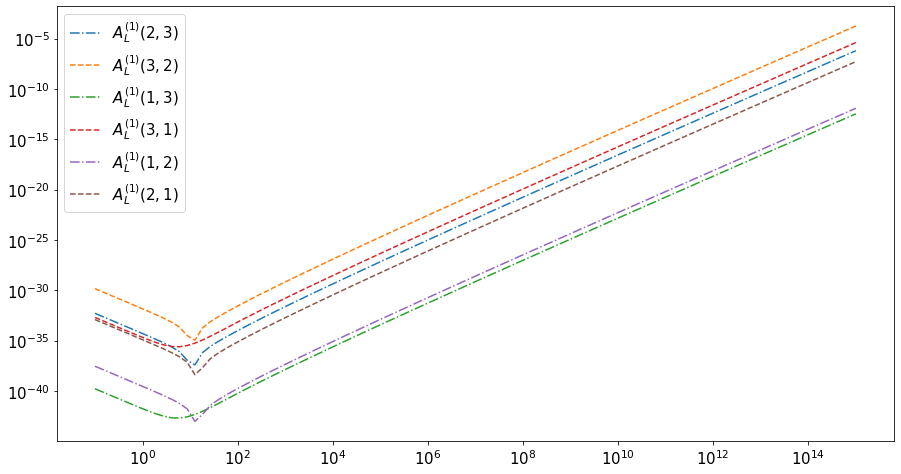

In [27]:
factor = valores[mh]/(8*pi)
plt.figure(figsize=(15,8))
plt.loglog(np.real(m6np),factor*abs(YLOne23)**2,'-.',label='$A_L^{(1)}(2,3)$')
plt.loglog(np.real(m6np),factor*abs(YLOne32)**2,'--',label='$A_L^{(1)}(3,2)$')

plt.loglog(np.real(m6np),factor*abs(YLOne13)**2,'-.',label='$A_L^{(1)}(1,3)$')
plt.loglog(np.real(m6np),factor*abs(YLOne31)**2,'--',label='$A_L^{(1)}(3,1)$')

plt.loglog(np.real(m6np),factor*abs(YLOne12)**2,'-.',label='$A_L^{(1)}(1,2)$')
plt.loglog(np.real(m6np),factor*abs(YLOne21)**2,'--',label='$A_L^{(1)}(2,1)$')
# plt.vlines(80.379,1e-34,1e-2,linestyles='--',color='r',label=r'$m_W$')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15)

### Form factor with two fermion in the loop.

In [22]:
def sumTwo(m6,ALab,a,b):
    AL = 0  
    mnk = (m1,m2,m3,m4(m6),m5(m6),m6)
    for i in range(1,4):
        for j in range(4,7):
            if i!=j:
                L = ALab(mnk[i-1],mnk[j-i],Unu(mnk[0],mnk[-1],b,j),conj(Unu(mnk[0],mnk[-1],a,i)),
                          Cij(mnk[0],mnk[-1],i,j),conj(Cij(mnk[0],mnk[-1],i,j)))
                if mp.isnan(L):
                    print(mnk[i-1],mnk[j-i],Unu(mnk[0],mnk[-1],b,j),Cij(mnk[0],mnk[-1],i,j),L)
                AL += L
    return AL

In [23]:
mnj = symbols('m_{n_j}',positive=True)
Cijs, Cijcs, Ubj = symbols('C_{ij}, {{C_{ij}^*}},U_{bj}')
UnuTwo = {mn[i]:mni,mn[jj]:mnj,C[i,jj]:Cijs, Cc[i,jj]:Cijcs, Uν[b,jj]:Ubj, Uνc[a,i]:Ucai}
UnuTwo

In [24]:
def numeric_sum_diagramsTwo(aa,bb,quirality='L'):
    if quirality=='L':
        x = AbL.subs(lfvhd.D,4).subs(cambios_hab(aa,bb)).subs(valores).subs(UnuTwo)
    elif quirality=='R':
        x = AbR.subs(lfvhd.D,4).subs(cambios_hab(aa,bb)).subs(valores).subs(UnuTwo)
    else:
        raise ValueError('quirality must be L or R')
    f = lambdify([mni,mnj,Ubj,Ucai,Cijs,Cijcs],replaceBs(x),
                 modules=[pave_functions(valores[mh],aa,bb,lib='mpmath'),'mpmath'] )
        
    fsum = lambda m6:sumTwo(m6,f,aa,bb)
    return fsum

In [25]:
# # a = 2, b = 3
# ALTwoTot23 = numeric_sum_diagramsTwo(2,3,quirality='L')
# ARTwoTot23 = numeric_sum_diagramsTwo(2,3,quirality='R')

# # a = 3, b = 2
# ALTwoTot32 = numeric_sum_diagramsTwo(3,2,quirality='L')
# ARTwoTot32 = numeric_sum_diagramsTwo(3,2,quirality='R')

# # a = 1, b = 3
# ALTwoTot13 = numeric_sum_diagramsTwo(1,3,quirality='L')
# ARTwoTot13 = numeric_sum_diagramsTwo(1,3,quirality='R')

# # a = 3, b = 1
# ALTwoTot31 = numeric_sum_diagramsTwo(3,1,quirality='L')
# ARTwoTot31 = numeric_sum_diagramsTwo(3,1,quirality='R')

# # a = 1, b = 2
# ALTwoTot12 = numeric_sum_diagramsTwo(1,2,quirality='L')
# ARTwoTot12 = numeric_sum_diagramsTwo(1,2,quirality='R')

# # a = 2, b = 1
# ALTwoTot21 = numeric_sum_diagramsTwo(2,1,quirality='L')
# ARTwoTot21 = numeric_sum_diagramsTwo(2,1,quirality='R')

# a = 2, b = 3
def ALTwoTot23(m6):
    return numeric_sum_diagramsTwo(2,3,quirality='L')(mpf(str(m6)))
def ARTwoTot23(m6):
    return numeric_sum_diagramsTwo(2,3,quirality='R')(mpf(str(m6)))

# a = 3, b = 2
def ALTwoTot32(m6):
    return numeric_sum_diagramsTwo(3,2,quirality='L')(mpf(str(m6)))
def ARTwoTot32(m6):
    return numeric_sum_diagramsTwo(3,2,quirality='R')(mpf(str(m6)))

# a = 1, b = 3
def ALTwoTot13(m6):
    return numeric_sum_diagramsTwo(1,3,quirality='L')(mpf(str(m6)))
def ARTwoTot13(m6):
    return numeric_sum_diagramsTwo(1,3,quirality='R')(mpf(str(m6)))

# a = 3, b = 1
def ALTwoTot31(m6):
    return numeric_sum_diagramsTwo(3,1,quirality='L')(mpf(str(m6)))
def ARTwoTot31(m6):
    return numeric_sum_diagramsTwo(3,1,quirality='R')(mpf(str(m6)))

# a = 1, b = 2
def ALTwoTot12(m6):
    return numeric_sum_diagramsTwo(1,2,quirality='L')(mpf(str(m6)))
def ARTwoTot12(m6):
    return numeric_sum_diagramsTwo(1,2,quirality='R')(mpf(str(m6)))

# a = 2, b = 1
def ALTwoTot21(m6):
    return numeric_sum_diagramsTwo(2,1,quirality='L')(mpf(str(m6)))
def ARTwoTot21(m6):
    return numeric_sum_diagramsTwo(2,1,quirality='R')(mpf(str(m6)))

In [26]:
n = 100
m6np = np.logspace(-1,15,n)
#m6np = np.linspace(1e-10,1e15,n)

In [64]:
# YLTwo23 = np.array([np.abs(ALTwoTot23(mpf(str(m6)))) for m6 in m6np])
# YLTwo32 = np.array([np.abs(ARTwoTot32(mpf(str(m6)))) for m6 in m6np])

# YLTwo13 = np.array([np.abs(ALTwoTot13(mpf(str(m6)))) for m6 in m6np])
# YLTwo31 = np.array([np.abs(ARTwoTot31(mpf(str(m6)))) for m6 in m6np])

# YLTwo12 = np.array([np.abs(ALTwoTot12(mpf(str(m6)))) for m6 in m6np])
# YLTwo21 = np.array([np.abs(ARTwoTot21(mpf(str(m6)))) for m6 in m6np])

In [39]:
YLTwo23 = speedup_array(ALTwoTot23,m6np)
YLTwo32 = speedup_array(ALTwoTot32,m6np)

YLTwo13 = speedup_array(ALTwoTot13,m6np)
YLTwo31 = speedup_array(ALTwoTot31,m6np)

YLTwo12 = speedup_array(ALTwoTot12,m6np)
YLTwo21 = speedup_array(ALTwoTot21,m6np)

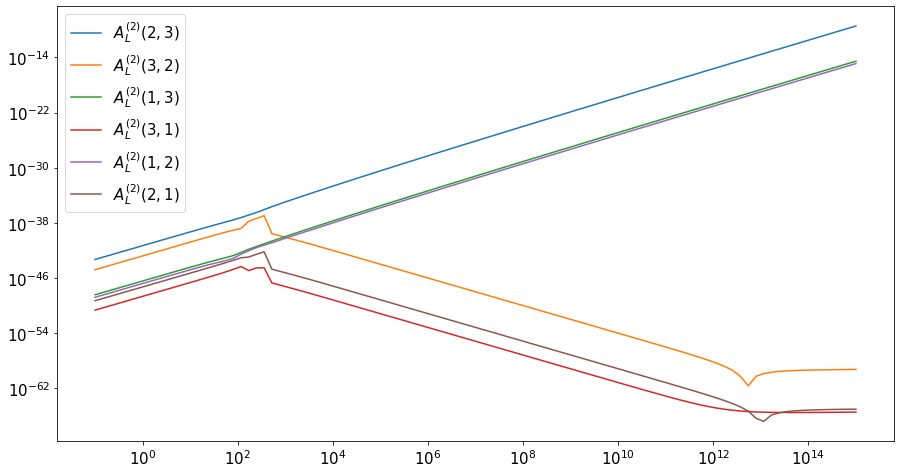

In [40]:
plt.figure(figsize=(15,8))

plt.loglog(np.real(m6np),abs(YLTwo23)**2,label='$A_L^{(2)}(2,3)$')
plt.loglog(np.real(m6np),abs(YLTwo32)**2,label='$A_L^{(2)}(3,2)$')

plt.loglog(np.real(m6np),abs(YLTwo13)**2,label='$A_L^{(2)}(1,3)$')
plt.loglog(np.real(m6np),abs(YLTwo31)**2,label='$A_L^{(2)}(3,1)$')

plt.loglog(np.real(m6np),abs(YLTwo12)**2,label='$A_L^{(2)}(1,2)$')
plt.loglog(np.real(m6np),abs(YLTwo21)**2,label='$A_L^{(2)}(2,1)$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15)

## Total Form Factors

In [24]:
# #a = 2, b = 3
# ALtot23 =lambda m6: ALOneTot23(mpf(str(m6)))[1] + ALTwoTot23(mpf(str(m6)))
# ARtot23 =lambda m6: AROneTot23(mpf(str(m6)))[1] + ARTwoTot23(mpf(str(m6)))

# #a = 3, b = 2
# ALtot32 =lambda m6: ALOneTot32(mpf(str(m6)))[1] + ALTwoTot32(mpf(str(m6)))
# ARtot32 =lambda m6: AROneTot32(mpf(str(m6)))[1] + ARTwoTot32(mpf(str(m6)))

# #a = 1, b = 3
# ALtot13 =lambda m6: ALOneTot13(mpf(str(m6)))[1] + ALTwoTot13(mpf(str(m6)))
# ARtot13 =lambda m6: AROneTot13(mpf(str(m6)))[1] + ARTwoTot13(mpf(str(m6)))

# #a = 3, b = 1
# ALtot31 =lambda m6: ALOneTot31(mpf(str(m6)))[1] + ALTwoTot31(mpf(str(m6)))
# ARtot31 =lambda m6: AROneTot31(mpf(str(m6)))[1] + ARTwoTot31(mpf(str(m6)))

# #a = 1, b = 2
# ALtot12 =lambda m6: ALOneTot12(mpf(str(m6)))[1] + ALTwoTot12(mpf(str(m6)))
# ARtot12 =lambda m6: AROneTot12(mpf(str(m6)))[1] + ARTwoTot12(mpf(str(m6)))

# #a = 2, b = 1
# ALtot21 =lambda m6: ALOneTot21(mpf(str(m6)))[1] + ALTwoTot21(mpf(str(m6)))
# ARtot21 =lambda m6: AROneTot21(mpf(str(m6)))[1] + ARTwoTot21(mpf(str(m6)))

In [37]:
#a = 2, b = 3
def ALtot23(m6):
    return  ALOneTot23(mpf(str(m6))) + ALTwoTot23(mpf(str(m6)))
def ARtot23(m6):
    return  AROneTot23(mpf(str(m6))) + ARTwoTot23(mpf(str(m6)))

#a = 3, b = 2
def ALtot32(m6):
    return  ALOneTot32(mpf(str(m6))) + ALTwoTot32(mpf(str(m6)))
def ARtot32(m6):
    return  AROneTot32(mpf(str(m6))) + ARTwoTot32(mpf(str(m6)))

#a = 1, b = 3
def ALtot13(m6):
    return  ALOneTot13(mpf(str(m6))) + ALTwoTot13(mpf(str(m6)))
def ARtot13(m6):
    return  AROneTot13(mpf(str(m6))) + ARTwoTot13(mpf(str(m6)))

#a = 3, b = 1
def ALtot31(m6):
    return  ALOneTot31(mpf(str(m6))) + ALTwoTot31(mpf(str(m6)))
def ARtot31(m6):
    return  AROneTot31(mpf(str(m6))) + ARTwoTot31(mpf(str(m6)))

#a = 1, b = 2
def ALtot12(m6):
    return  ALOneTot12(mpf(str(m6))) + ALTwoTot12(mpf(str(m6)))
def ARtot12(m6):
    return  AROneTot12(mpf(str(m6))) + ARTwoTot12(mpf(str(m6)))

#a = 2, b = 1
def ALtot21(m6):
    return  ALOneTot21(mpf(str(m6))) + ALTwoTot21(mpf(str(m6)))
def ARtot21(m6):
    return  AROneTot21(mpf(str(m6))) + ARTwoTot21(mpf(str(m6)))

In [108]:
#%time speedup_array(ALtot32,mn,procs=4)

## Width decay of $h \to e_a e_b$

In [28]:
from OneLoopLFVHD import Γhlilj

In [33]:
n = 100
m6np = np.logspace(-1,15,n)

In [38]:
def Γhl2l3(m6):
    return Γhlilj(ALtot23(m6),ARtot23(m6),valores[mh],ml[2],ml[3])
def Γhl3l2(m6):
    return Γhlilj(ALtot32(m6),ARtot32(m6),valores[mh],ml[3],ml[2])

def Γhl1l3(m6):
    return Γhlilj(ALtot13(m6),ARtot13(m6),valores[mh],ml[1],ml[3])
def Γhl3l1(m6):
    return Γhlilj(ALtot31(m6),ARtot31(m6),valores[mh],ml[3],ml[1])

def Γhl1l2(m6):
    return Γhlilj(ALtot12(m6),ARtot12(m6),valores[mh],ml[1],ml[2])
def Γhl2l1(m6):
    return Γhlilj(ALtot21(m6),ARtot21(m6),valores[mh],ml[2],ml[1])

In [110]:

# YW23 = np.array([Γhlilj(ALtot23(m6),ARtot23(m6),valores[mh],ml[2],ml[3]) for m6 in m6np])
# YW32 = np.array([Γhlilj(ALtot32(m6),ARtot32(m6),valores[mh],ml[3],ml[2]) for m6 in m6np])

# YW13 = np.array([Γhlilj(ALtot13(m6),ARtot13(m6),valores[mh],ml[1],ml[3]) for m6 in m6np])
# YW31 = np.array([Γhlilj(ALtot31(m6),ARtot31(m6),valores[mh],ml[3],ml[1]) for m6 in m6np])

# YW12 = np.array([Γhlilj(ALtot12(m6),ARtot12(m6),valores[mh],ml[1],ml[2]) for m6 in m6np])
# YW21 = np.array([Γhlilj(ALtot21(m6),ARtot21(m6),valores[mh],ml[2],ml[1]) for m6 in m6np])

In [45]:
%%time
YW23 = speedup_array(Γhl2l3,m6np)
YW32 = speedup_array(Γhl3l2,m6np)

YW13 = speedup_array(Γhl1l3,m6np)
YW31 = speedup_array(Γhl3l1,m6np)

YW12 = speedup_array(Γhl1l2,m6np)

YW21 = speedup_array(Γhl2l1,m6np)

CPU times: user 2.25 s, sys: 2 s, total: 4.24 s
Wall time: 10min 15s


In [46]:
Wtot = (
    YW23 + YW13 + YW12 + 
    0.0032 + YW32 + YW31 + YW21) 

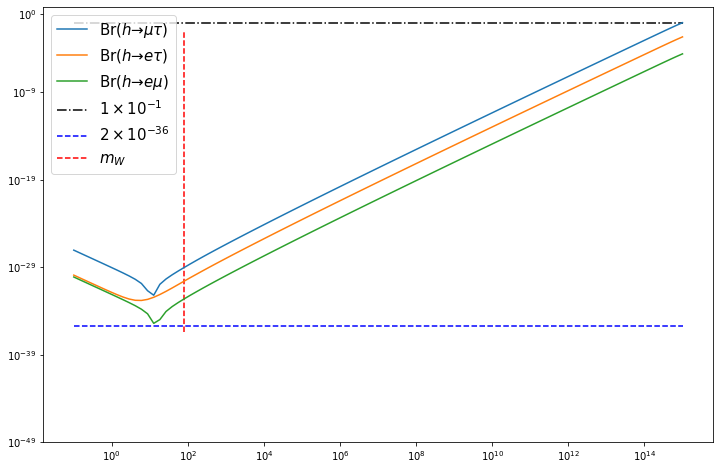

In [47]:
plt.figure(figsize=(12,8))
plt.loglog(np.real(m6np),(
    YW23 + 
    YW32
)/Wtot,label=r'Br($h \to \mu \tau$)')
plt.loglog(np.real(m6np),(
    YW13 + 
    YW31
)/Wtot,label=r'Br($h \to e \tau$)')
plt.loglog(np.real(m6np),(
    YW12 + 
    YW21
)/Wtot,label=r'Br($h \to e \mu$)')

plt.hlines(1e-1,0.1,1e15,linestyles='-.',label=r'$1\times 10^{-1}$')
plt.hlines(2e-36,0.1,1e15,linestyles='--',color='b',label=r'$2\times 10^{-36}$')
plt.vlines(80.379,4e-37,1e-2,linestyles='--',color='r',label=r'$m_W$')
#plt.ylim(1e-49,1)
plt.yticks([1e-49,1e-39,1e-29,1e-19,1e-9,1])
plt.legend(fontsize=15)

In [36]:
from seesaw_FF import TrianglesOneFermion, TrianglesTwoFermion, Bubbles

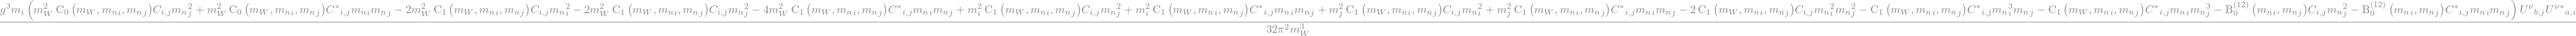

In [53]:
δ1 = (AbL - (TrianglesTwoFermion[0].AL() + TrianglesTwoFermion[1].AL())).subs(lfvhd.D,4)
δ1.simplify()

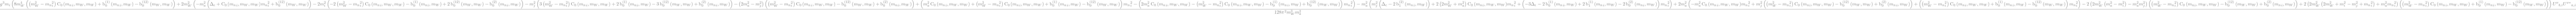

In [63]:
δ2 = (AaL - sum(tria.AL() for tria in TrianglesOneFermion)).subs(lfvhd.D,4)
a2 = δ2.subs(lfvhd.cambiosDivFin(mn[i],mW,mW)).simplify()
a2

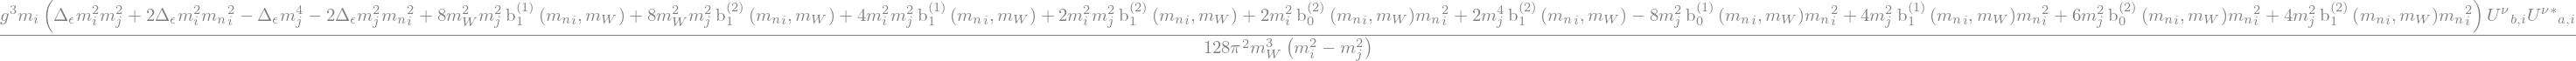

In [64]:
δ3 = (AcdL - sum(tria.AL() for tria in Bubbles)).subs(lfvhd.D,4)
a3 = δ3.subs(lfvhd.cambiosDivFin(mn[i],mW,mW)).simplify()
a3

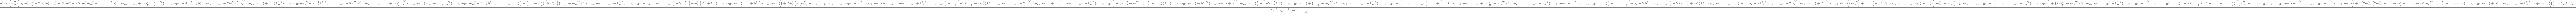

In [65]:
(a2 + a3).simplify()